### PART A 

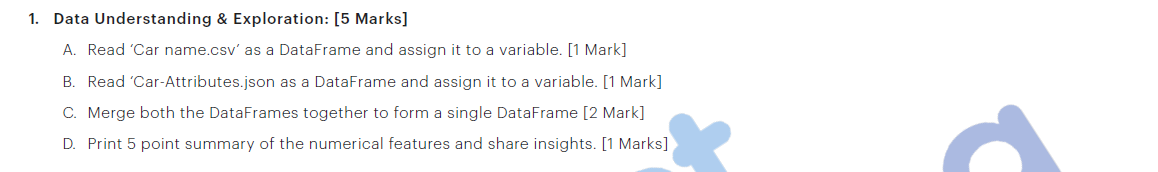

In [354]:
import pandas as pd
import numpy as np

In [355]:
df1=pd.read_csv(r"C:\Users\arjit\Desktop\Python\Unsupervised Learning\Final Project\Car name.csv")
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [356]:
df2 = pd.read_json(r"C:\Users\arjit\Desktop\Python\Unsupervised Learning\Final Project\Car-Attributes.json")
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [357]:
#Rows from df1 and df2 with the same index value will be merged into a single row in df.
df= pd.merge(df1, df2, left_index=True, right_index=True)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [358]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


#### mpg (Miles Per Gallon):

Average fuel efficiency: 23.5 mpg

Range: 9.0 to 46.6 mpg

Most cars fall between 17.5 and 29.0 mpg.

#### cyl (Number of Cylinders):


Average cylinders: 5.45

Types: 3, 4, 6, 8 cylinders

Most cars have 4 cylinders.

#### disp (Engine Displacement):

Average displacement: 193.43 cubic inches

Range: 68.0 to 455.0 cubic inches

Positively skewed; some higher-displacement engines.

#### wt (Vehicle Weight):

Average weight: 2970.42 pounds

Range: 1613.0 to 5140.0 pounds

Spread out; noticeable difference between mean and median.

#### acc (Acceleration):

Average acceleration: 15.57 seconds

Range: 8.0 to 24.8 seconds

Relatively symmetric distribution.

#### yr (Model Year):

Years: 1970 to 1982

Most cars are from the late 1970s.

#### origin (Origin):

Categorical values: 1, 2, 3

Most cars have an origin of 1.

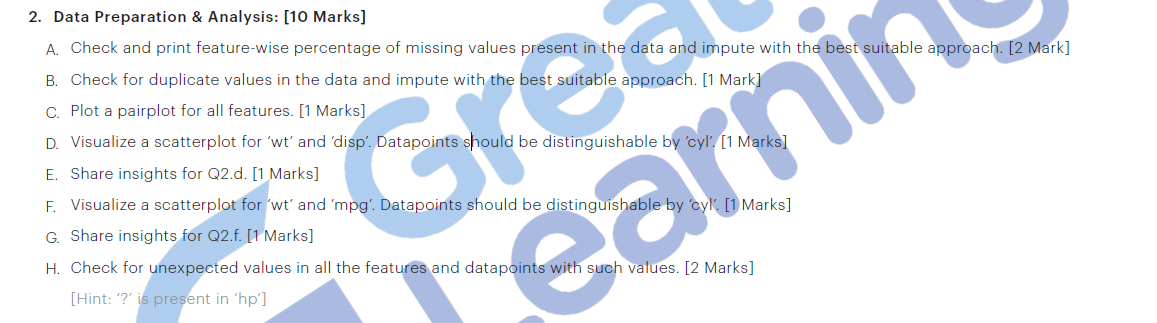

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [360]:
#checking for unquie values in each coloumn
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

### HP has a '?' as a unique value, so replacing that with NaN

In [361]:
# Replacing '?' with NaN in 'hp' column
df['hp'] = df['hp'].replace('?', np.nan)

# Converting 'hp' column to float64
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')

# Verifying the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        392 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [362]:
df.isnull().mean()*100

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

### Given that the "hp" column has a relatively small percentage of missing values (1.51%), imputing with the mean seems to be the reasonable approach. 

In [363]:
# Impute missing values with the mean
df['hp'].fillna(df['hp'].mean(), inplace=True)

In [364]:
#checking for unquie values in Hp coloumn
df['hp'].unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

### The '?' has been replaced with the mean

In [365]:
df.duplicated().sum()

0

### There are no duplicate rows

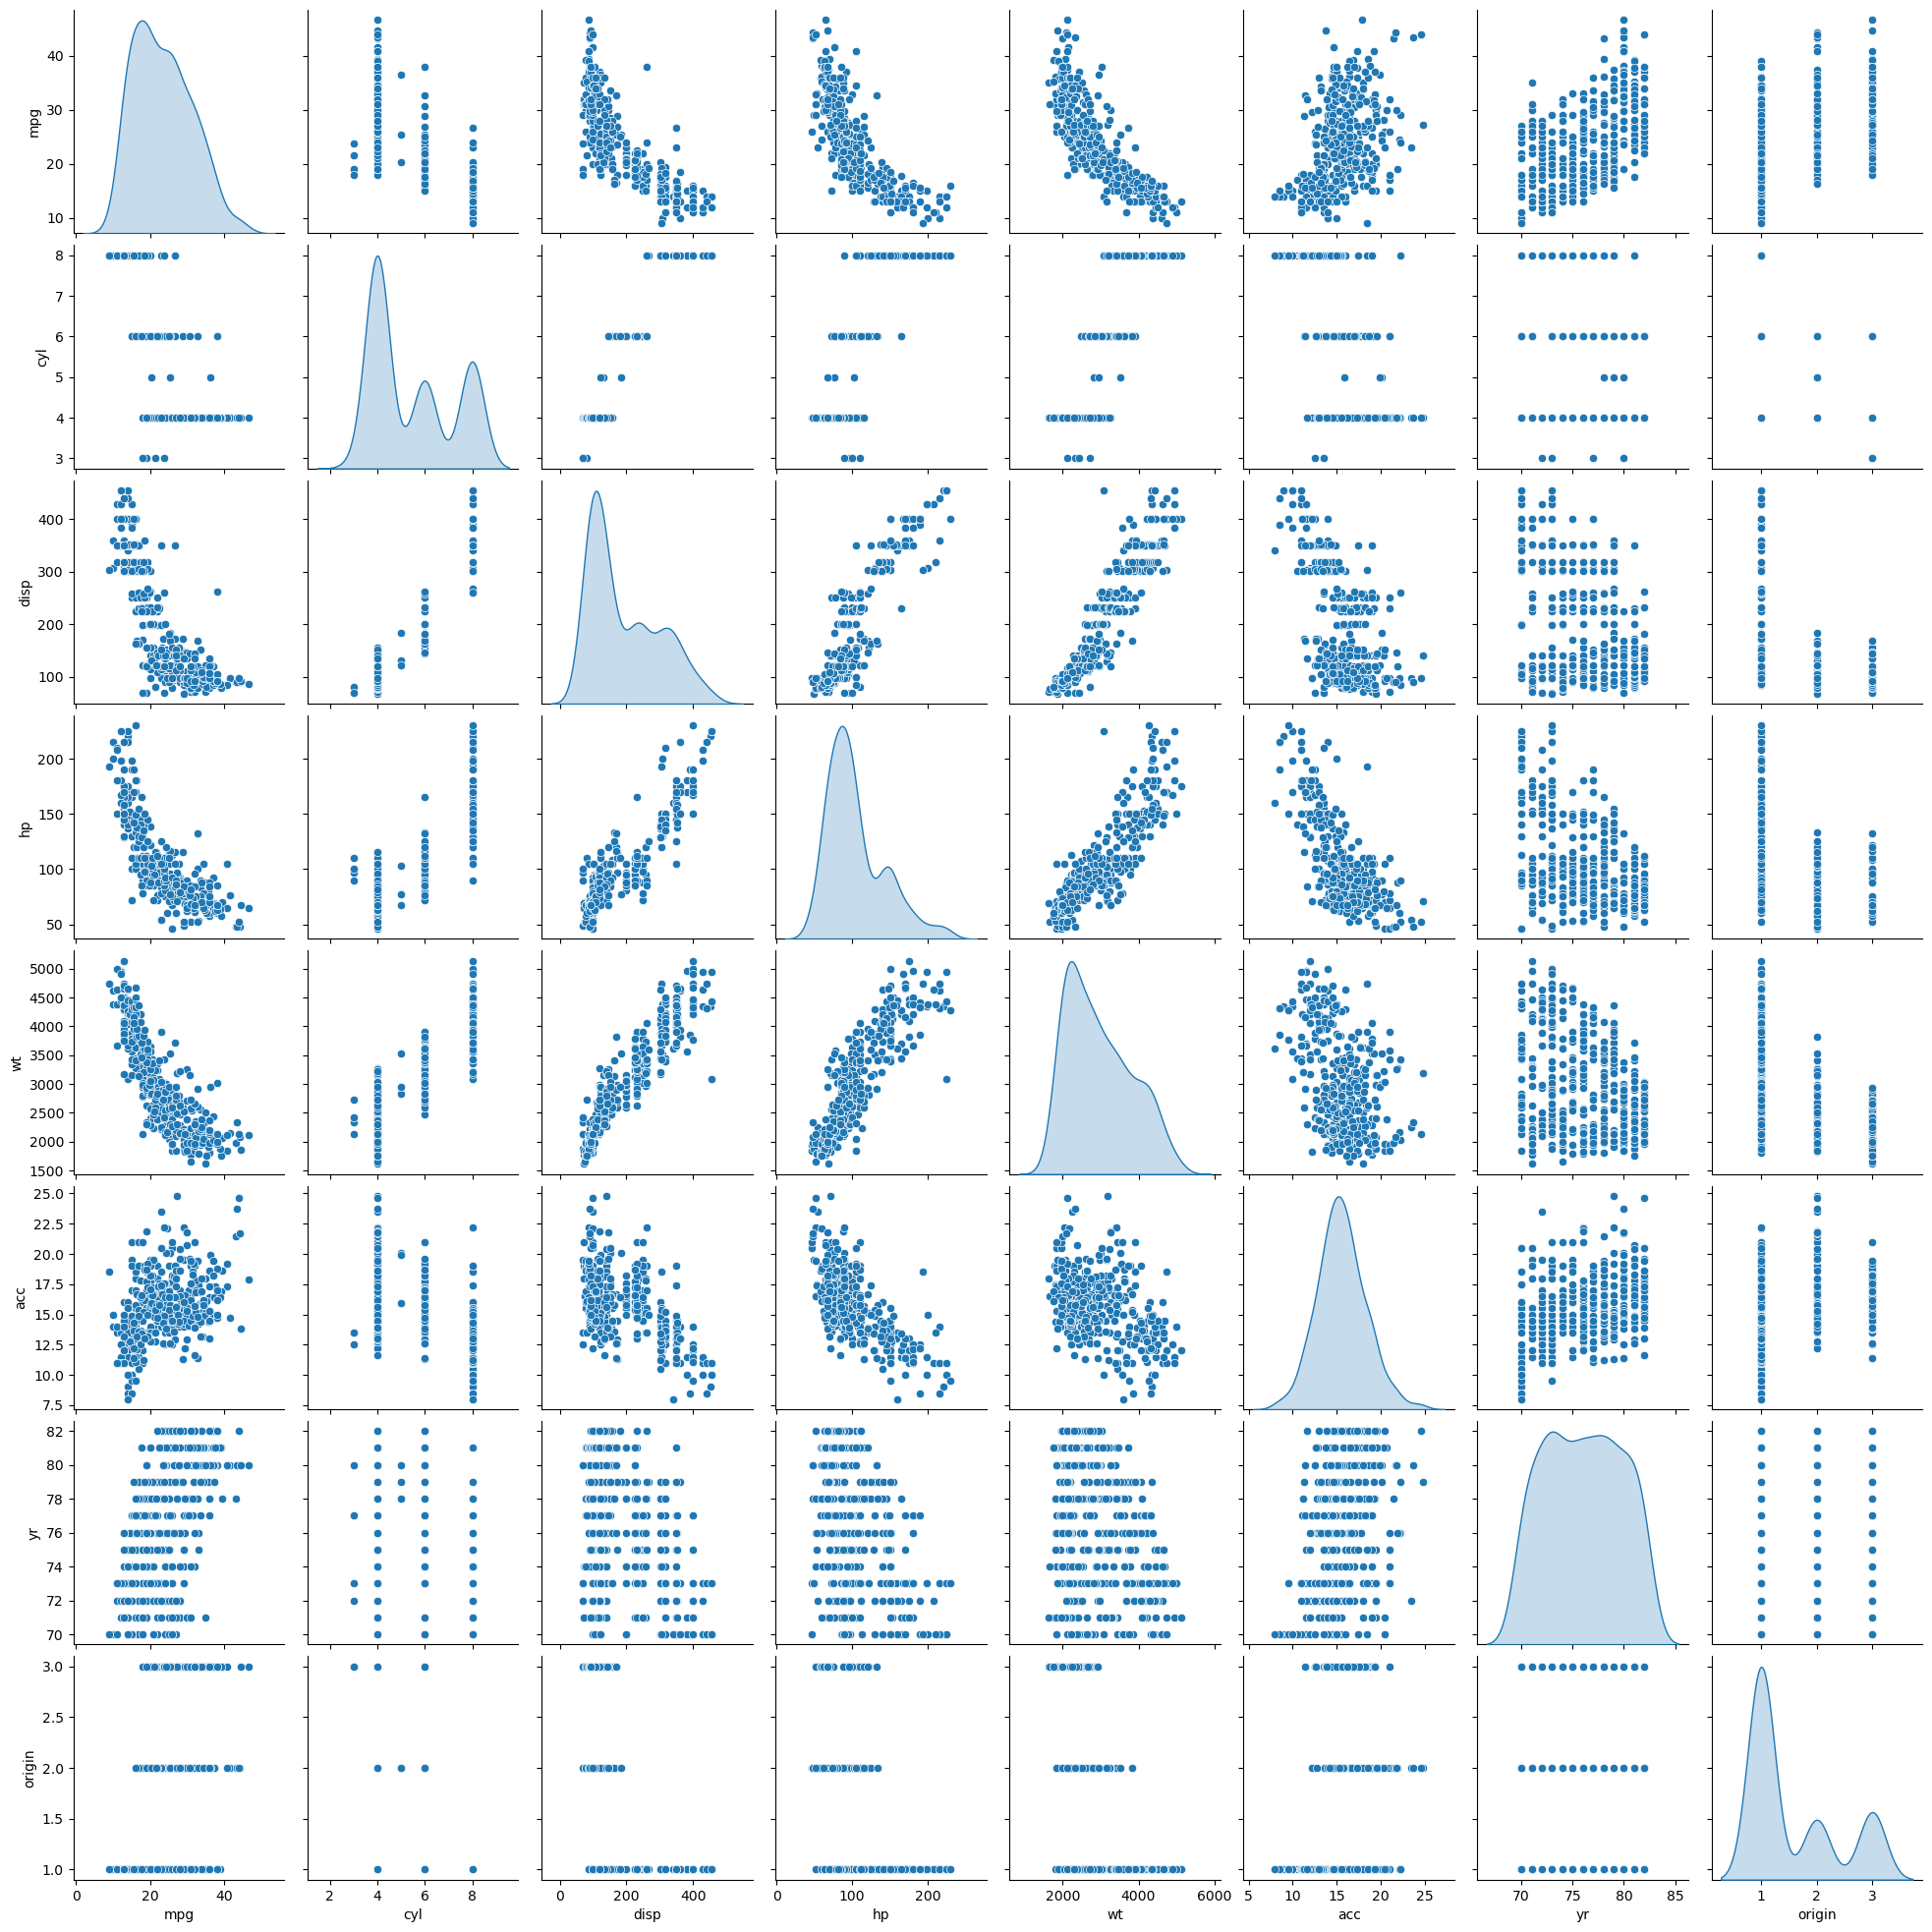

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


Automobile=df.iloc[:,1:]
AutomobileScaled=Automobile.apply(zscore)
sns.pairplot(Automobile,diag_kind='kde')

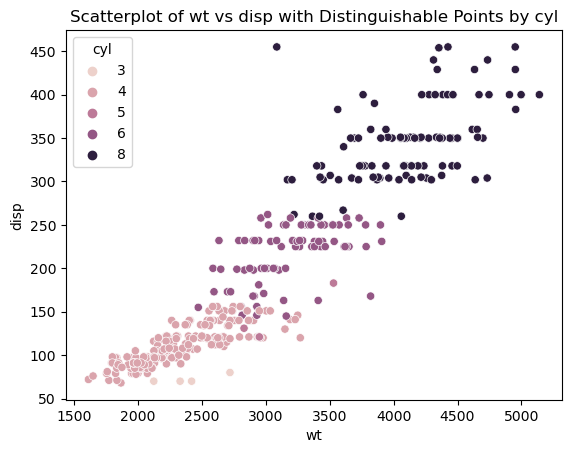

In [367]:
# Creating a scatterplot with distinguishable points by 'cyl'
sns.scatterplot(x='wt', y='disp', hue='cyl', data=df)
plt.title('Scatterplot of wt vs disp with Distinguishable Points by cyl')
plt.show()

The data demonstrates that cars with a greater number of cylinders are generally heavier, and there is a corresponding increase in engine size. In simpler terms, more cylinders usually mean a heavier car with a larger engine. This correlation suggests that cars with more cylinders are designed to be more powerful, contributing to both increased weight and a larger engine for improved performance.

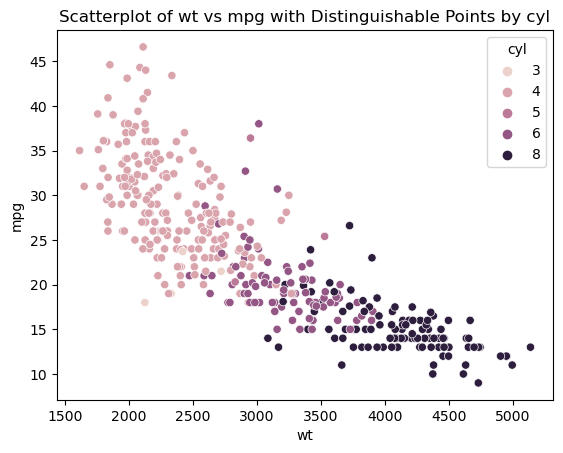

In [368]:
# Creating a scatterplot with distinguishable points by 'cyl'
sns.scatterplot(x='wt', y='mpg', hue='cyl', data=df)
plt.title('Scatterplot of wt vs mpg with Distinguishable Points by cyl')
plt.show()

The data shows a negative correlation between miles per gallon (MPG) and weight, indicating that heavier cars tend to have lower fuel efficiency. Additionally, as the number of cylinders increases, there is a corresponding decrease in mileage. This trend may be attributed to factors such as increased engine size and power demand in cars with more cylinders, contributing to higher weight and lower fuel efficiency.

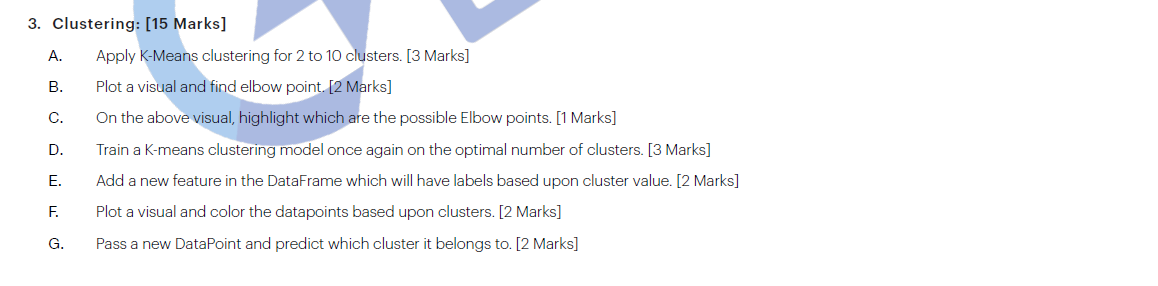

C:\Users\arjit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arjit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\arjit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arjit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

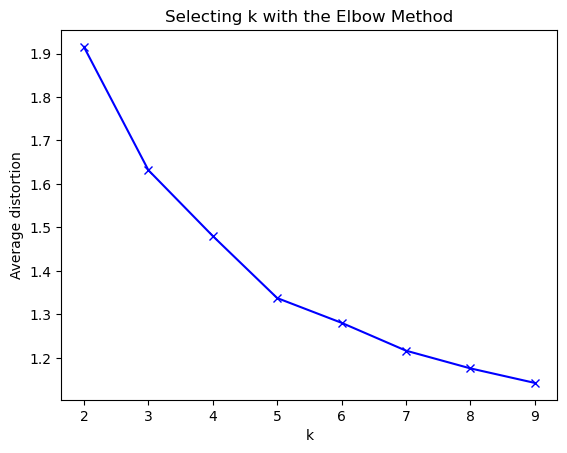

In [369]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(AutomobileScaled)
    prediction=model.predict(AutomobileScaled)
    meanDistortions.append(sum(np.min(cdist(AutomobileScaled, model.cluster_centers_, 'euclidean'), axis=1)) / AutomobileScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Observing the graph of Average Distortion versus K, it becomes evident that beyond K=5, the graph levels off, indicating no significant changes. Hence, I have decided to select K=5 to create five distinct clusters.

In [370]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(AutomobileScaled)
prediction=final_model.predict(AutomobileScaled)

#Append the prediction 
Automobile["GROUP"] = prediction
AutomobileScaled["GROUP"] = prediction
print("Groups Assigned : \n")
Automobile.head()

Groups Assigned : 



C:\Users\arjit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arjit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,4
1,15.0,8,350.0,165.0,3693,11.5,70,1,4
2,18.0,8,318.0,150.0,3436,11.0,70,1,4
3,16.0,8,304.0,150.0,3433,12.0,70,1,4
4,17.0,8,302.0,140.0,3449,10.5,70,1,4


In [371]:
AutomobileClust = Automobile.groupby(['GROUP'])
AutomobileClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,24.619048,4.047619,108.601190,85.803207,2347.619048,16.107143,73.309524,2.107143
1,28.791045,4.194030,132.567164,83.193116,2563.805970,16.549254,79.671642,1.074627
2,19.104938,6.222222,233.444444,102.018141,3298.580247,16.632099,75.703704,1.037037
3,34.137500,4.083333,99.527778,73.179705,2155.819444,16.734722,79.416667,2.763889
4,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000


array([[<Axes: title={'center': 'acc'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'disp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'hp'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'mpg'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'origin'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'wt'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'yr'}, xlabel='[GROUP]'>]], dtype=object)

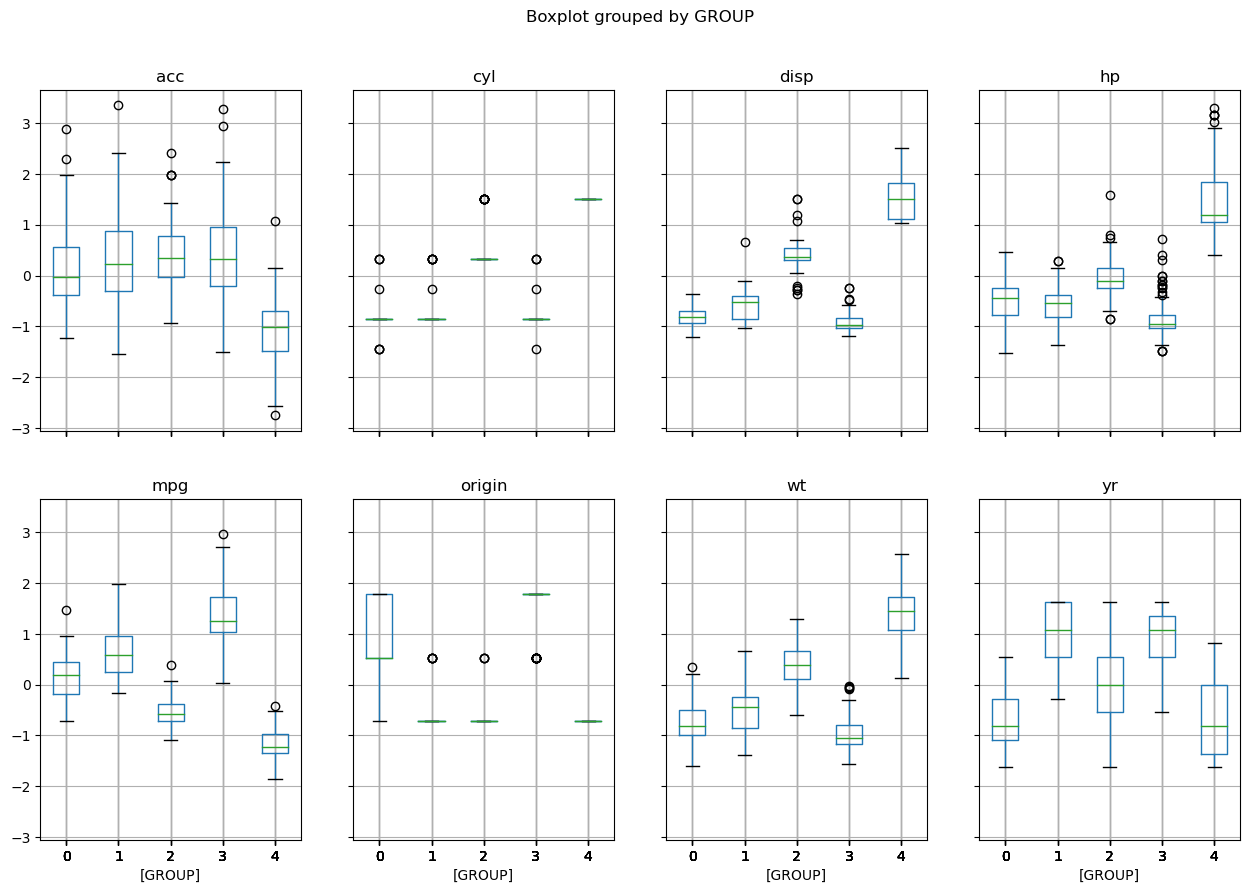

In [372]:
AutomobileScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Passing a new DataPoint and predicting which cluster it belongs to:

In [373]:
# New data point
new_data_point = {'mpg': 16,'cyl': 2,'disp': 10,'hp': 90,  'wt': 3500, 'acc': 16,'yr':75, 'origin':2}
new_Automobile = pd.DataFrame([new_data_point])
new_Automobile.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,16,2,10,90,3500,16,75,2


In [374]:
# Append the new data point to the existing DataFrame
Automobile = Automobile.append(new_Automobile, ignore_index=True)
print(Automobile)

      mpg  cyl   disp     hp    wt   acc  yr  origin  GROUP
0    18.0    8  307.0  130.0  3504  12.0  70       1    4.0
1    15.0    8  350.0  165.0  3693  11.5  70       1    4.0
2    18.0    8  318.0  150.0  3436  11.0  70       1    4.0
3    16.0    8  304.0  150.0  3433  12.0  70       1    4.0
4    17.0    8  302.0  140.0  3449  10.5  70       1    4.0
..    ...  ...    ...    ...   ...   ...  ..     ...    ...
394  44.0    4   97.0   52.0  2130  24.6  82       2    3.0
395  32.0    4  135.0   84.0  2295  11.6  82       1    1.0
396  28.0    4  120.0   79.0  2625  18.6  82       1    1.0
397  31.0    4  119.0   82.0  2720  19.4  82       1    1.0
398  16.0    2   10.0   90.0  3500  16.0  75       2    NaN

[399 rows x 9 columns]


C:\Users\arjit\AppData\Local\Temp\ipykernel_2100\2175190314.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Automobile = Automobile.append(new_Automobile, ignore_index=True)


We see that we have added a 399th row at the bottom in the Automible dataset, we will run the same code again to see where it will fall

In [375]:
predicted_cluster = model.predict(new_Automobile)
print("Predicted Cluster:", predicted_cluster[0])

Predicted Cluster: 5


### PART B

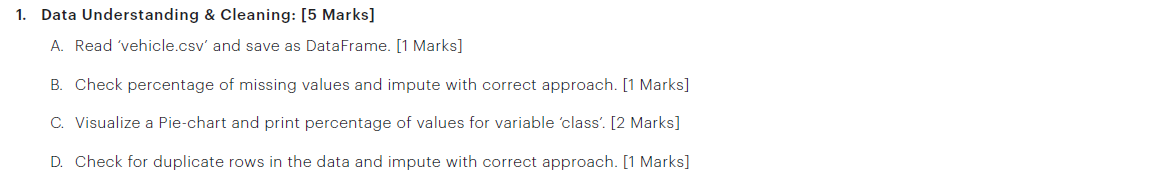

In [376]:
import pandas as pd
import numpy as np

In [377]:
df2=pd.read_csv(r"C:\Users\arjit\Desktop\Python\Unsupervised Learning\Final Project\vehicle.csv")
df2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [378]:
df2.isnull().mean()*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [379]:
df2['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

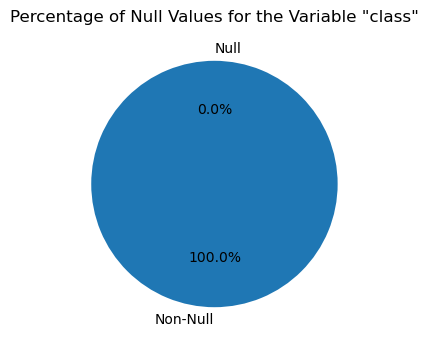

In [380]:
import matplotlib.pyplot as plt

null_percentages = df2['class'].isnull().mean() * 100

# Creating a Pie Chart
plt.figure(figsize=(4, 4))
plt.pie([100 - null_percentages, null_percentages], labels=['Non-Null', 'Null'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Null Values for the Variable "class"')
plt.show()

In [381]:
df2.duplicated().sum()

0

There are no duplicate rows in the DataFrame 'df2'

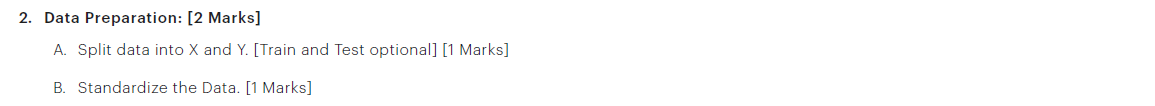

In [382]:
from sklearn.model_selection import train_test_split

#Splitting into X and Y
X = df2.drop('class', axis=1)  
Y = df2['class']  

# Splitting X and Y into Train and Test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#assuming the test size as 80-20.

In [383]:
#standardizing the data

from sklearn.preprocessing import StandardScaler

#Creating a StandardScaler instance
scaler = StandardScaler()

#Fitting the scaler on the training data and transforming it
X_train_scaled = scaler.fit_transform(X_train)

#Transforming the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [384]:
from sklearn.impute import SimpleImputer

#Creating an imputer instance
imputer = SimpleImputer(strategy='median')  # You can use 'median' or 'constant' as well

# Fitting and transforming the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transforming the testing data using the same imputer
X_test_imputed = imputer.transform(X_test_scaled)

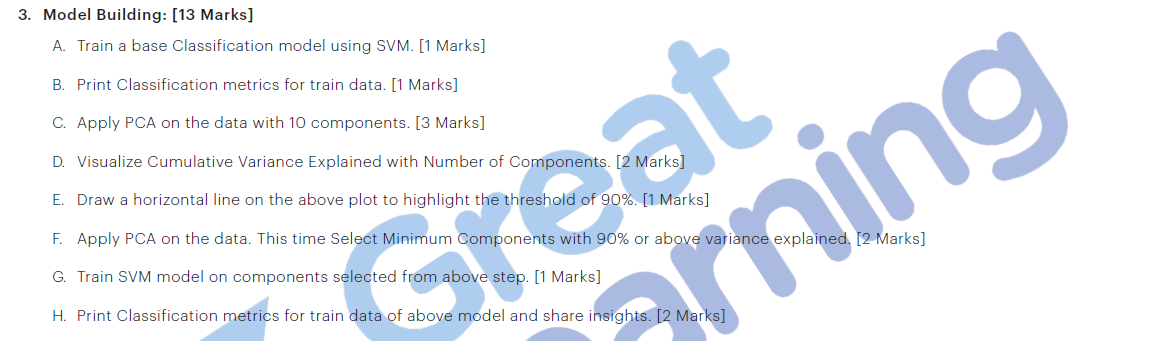

#### Training a base Classification model using SVM

In [385]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#creating an SVM classifier
svm_classifier = SVC(kernel='rbf')  # We can choose different kernels (linear, rbf, poly, etc.), taking 'rbf' because it is
#resulting in higher accuracy

#Training the model on the training data
svm_classifier.fit(X_train_imputed, Y_train)

#Making predictions on the testing data
predictions = svm_classifier.predict(X_test_imputed)

#Evaluating the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.47%


#### Print Classification metrics for train data

In [386]:
from sklearn.metrics import classification_report
# Making predictions on the training data
train_predictions = svm_classifier.predict(X_train_imputed)

# Printing classification report for the training data
print("Classification Report for Train Data:\n", classification_report(Y_train, train_predictions))

Classification Report for Train Data:
               precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       1.00      0.97      0.98       351
         van       0.93      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.97       676
weighted avg       0.98      0.98      0.98       676



#### Apply PCA on the data with 10 components.

In [387]:
from sklearn.decomposition import PCA

# Creating a PCA instance with 10 components
pca = PCA(n_components=10)

# Fitting and transforming the training data
X_train_pca = pca.fit_transform(X_train_imputed)

# Transforming the testing data using the same PCA transformation
X_test_pca = pca.transform(X_test_imputed)

#### Visualize Cumulative Variance Explained with Number of Components

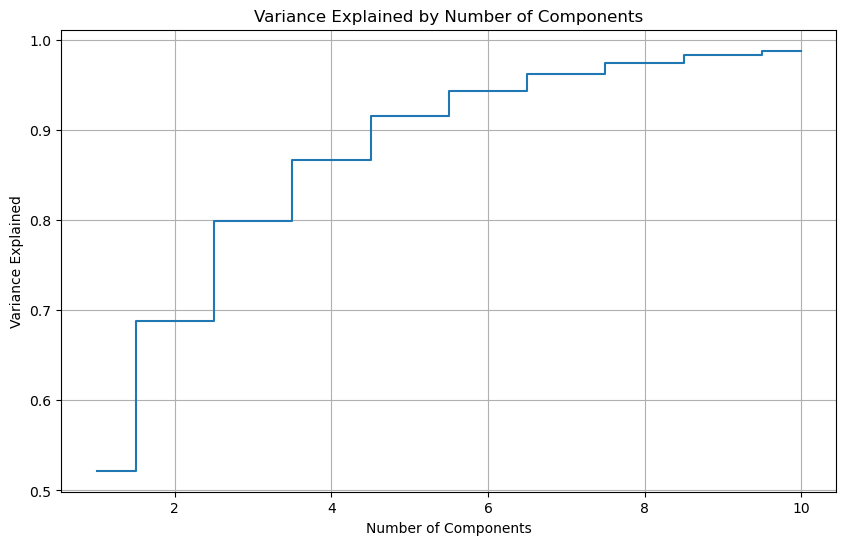

In [388]:
import matplotlib.pyplot as plt

# Calculating the cumulative explained variance for the 10 components
cumulative_variance = pca.explained_variance_ratio_

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.step(range(1, 11), np.cumsum(cumulative_variance), where='mid')
plt.title('Variance Explained by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

#### Draw a horizontal line on the above plot to highlight the threshold of 90%

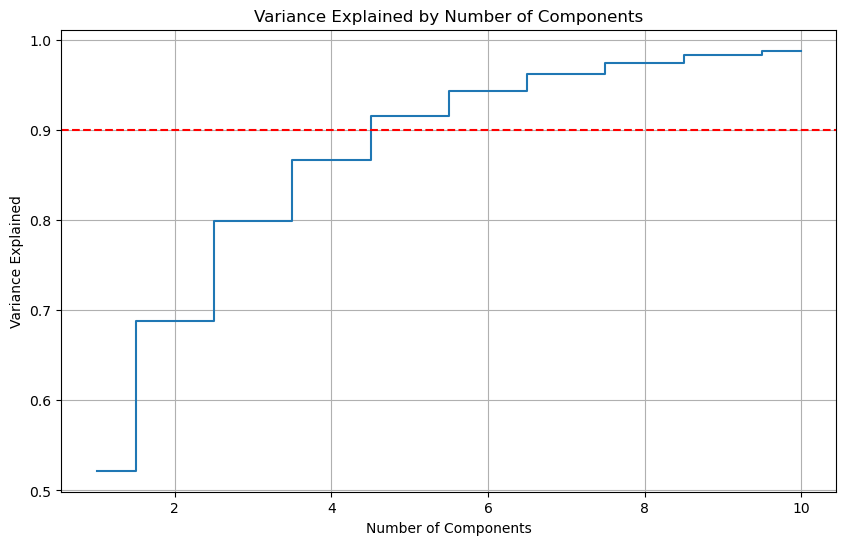

In [389]:
# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.step(range(1, 11), np.cumsum(cumulative_variance), where='mid')
plt.title('Variance Explained by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
threshold = 0.9
plt.axhline(y=0.9, color='r', linestyle='--', label=f'Threshold = {threshold * 100:.0f}%')
plt.grid(True)
plt.show()

#### Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

In [390]:
# Creating a PCA instance with 10 components
pca = PCA(n_components=6)

# Fitting and transforming the training data
X_train_pca = pca.fit_transform(X_train_imputed)

# Transforming the testing data using the same PCA transformation
X_test_pca = pca.transform(X_test_imputed)

#### Train SVM model on components selected from above step.

In [391]:
    # Creating an SVM classifier
    svm_classifier_pca = SVC(kernel='rbf')

    # Training the model on the PCA-transformed training data
    svm_classifier_pca.fit(X_train_pca, Y_train)

    # Making predictions on the PCA-transformed testing data
    predictions_pca = svm_classifier_pca.predict(X_test_pca)

    # Evaluating the model
    accuracy_pca = accuracy_score(Y_test, predictions_pca)
    print(f"Accuracy with PCA: {accuracy_pca * 100:.2f}%")

Accuracy with PCA: 87.06%


#### Print Classification metrics for train data of above model and share insights

In [392]:
# Making predictions on the PCA-transformed training data
train_predictions_pca = svm_classifier_pca.predict(X_train_pca)

# Printing classification report
print("Classification Report for SVM on PCA-transformed Training Data:")
print(classification_report(Y_train, train_predictions_pca))

Classification Report for SVM on PCA-transformed Training Data:
              precision    recall  f1-score   support

         bus       0.92      0.83      0.87       166
         car       0.91      0.92      0.92       351
         van       0.86      0.92      0.89       159

    accuracy                           0.90       676
   macro avg       0.90      0.89      0.89       676
weighted avg       0.90      0.90      0.90       676



The model performs really well when we don't use PCA, achieving a high accuracy of 98% and showing excellent precision, recall, and F1-scores for the different vehicle classes (bus, car, van). It excels in accurately categorizing instances for each vehicle type. However, when we apply PCA with 6 components, there's a slight dip in performance. Even though accuracy decreases to 90%, the model still maintains good precision, recall, and F1-scores. Interestingly, the PCA-transformed model struggles a bit more in correctly identifying instances of the "bus" class compared to the original model.


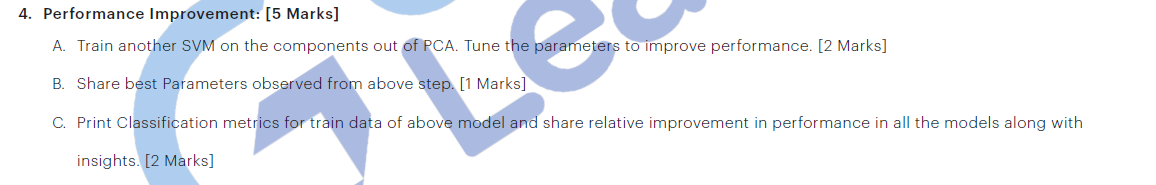

#### Train another SVM on the components out of PCA. Tune the parameters to improve performance
#### Share best Parameters observed from above step

In [393]:
from sklearn.model_selection import GridSearchCV

# Defining a hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Creating an SVM classifier
svm_classifier_tuned = SVC()

# Creating a GridSearchCV object
grid_search = GridSearchCV(svm_classifier_tuned, param_grid, cv=5, scoring='accuracy')

# Fitting the model to the PCA-transformed training data
grid_search.fit(X_train_pca, Y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Making predictions on the PCA-transformed testing data using the best model
predictions_tuned = grid_search.predict(X_test_pca)

# Evaluating the tuned model
accuracy_tuned = accuracy_score(Y_test, predictions_tuned)
print(f"Accuracy with Tuned SVM: {accuracy_tuned * 100:.2f}%")

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy with Tuned SVM: 89.41%


#### Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights

In [394]:
# Making predictions on the PCA-transformed training data using the best model
predictions_train_tuned = grid_search.predict(X_train_pca)

# Printing the classification report
classification_report_train_tuned = classification_report(Y_train, predictions_train_tuned)
print("Classification Report for SVM on PCA-transformed Training Data (Tuned):")
print(classification_report_train_tuned)

Classification Report for SVM on PCA-transformed Training Data (Tuned):
              precision    recall  f1-score   support

         bus       0.94      0.93      0.94       166
         car       0.97      0.95      0.96       351
         van       0.93      0.97      0.95       159

    accuracy                           0.95       676
   macro avg       0.94      0.95      0.95       676
weighted avg       0.95      0.95      0.95       676



Initially, the model achieved an accuracy of 90%, but after fine-tuning, it improved to 95%. The improvement means that the model got better at correctly identifying and classifying vehicles. Additionally, Precision, recall, and F1-scores for all classes have improved after tuning the SVM model.

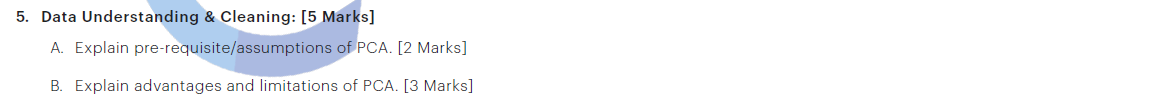

#### Pre-requisite/assumptions

-- The dataset must exhibit linearity, meaning the variables combine linearly to form the dataset, indicating relationships among them.

-- PCA emphasizes paying attention to principal components with high variance and disregarding those with lower variance as noise. The framework, based on the Pearson correlation coefficient, assumes that axes with high variance become principal components.

-- All variables should be measured on the same ratio level. A preferable norm is at least 150 observations with a ratio measurement of 5:1.

-- The dataset should have minimal outliers, extreme values that deviate from other data points. A higher number of outliers may represent experimental errors and degrade machine learning models/algorithms.

-- The feature set should exhibit correlation, and the reduced feature set after applying PCA will effectively represent the original dataset with fewer dimensions.

#### Advantages of Using PCA:

PCA offers computational simplicity since it relies on linear algebra, making it easily solvable by computers. It enhances the efficiency of other machine learning algorithms, as they often converge more quickly on principal components compared to the original dataset. This efficiency boost is a key factor driving the preference for PCA in machine learning.

#### Disadvantage of Using PCA:

A notable drawback of PCA arises when using various statistical software tools, as they commonly assume that features contain no empty rows or missing values. To address this issue, one effective solution is to promptly remove rows or columns with missing values or fill in the gaps with a close approximation.





